In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Loading the Data into Python and understanding the data</h3>

In [15]:
# Define the path to your dataset (adjust if necessary)
dataset_path = 'UCI HAR Dataset/' # Assuming you are running from the parent directory of UCI HAR Dataset

# Load training data
X_train = pd.read_csv(f'{dataset_path}train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv(f'{dataset_path}train/y_train.txt', delim_whitespace=True, header=None)
subject_train = pd.read_csv(f'{dataset_path}train/subject_train.txt', delim_whitespace=True, header=None)

# Load test data
X_test = pd.read_csv(f'{dataset_path}test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv(f'{dataset_path}test/y_test.txt', delim_whitespace=True, header=None)
subject_test = pd.read_csv(f'{dataset_path}test/subject_test.txt', delim_whitespace=True, header=None)

# Load features and activity labels
features = pd.read_csv(f'{dataset_path}features.txt', delim_whitespace=True, header=None)
activity_labels = pd.read_csv(f'{dataset_path}activity_labels.txt', delim_whitespace=True, header=None)

# Let's inspect the shapes of the loaded dataframes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("subject_train shape:", subject_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("subject_test shape:", subject_test.shape)
print("features shape:", features.shape)
print("activity_labels shape:", activity_labels.shape)

/tmp/ipykernel_21397/1679190789.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(f'{dataset_path}train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(f'{dataset_path}train/y_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_train = pd.read_csv(f'{dataset_path}train/subject_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use `

X_train shape: (7352, 561)
y_train shape: (7352, 1)
subject_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)
subject_test shape: (2947, 1)
features shape: (561, 2)
activity_labels shape: (6, 2)


/tmp/ipykernel_21397/1679190789.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(f'{dataset_path}test/y_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_test = pd.read_csv(f'{dataset_path}test/subject_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(f'{dataset_path}features.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\

Assigning feature names, activity names, see the distribution of each class, data scaling and seeing the scaled data

X_train with feature names:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAc

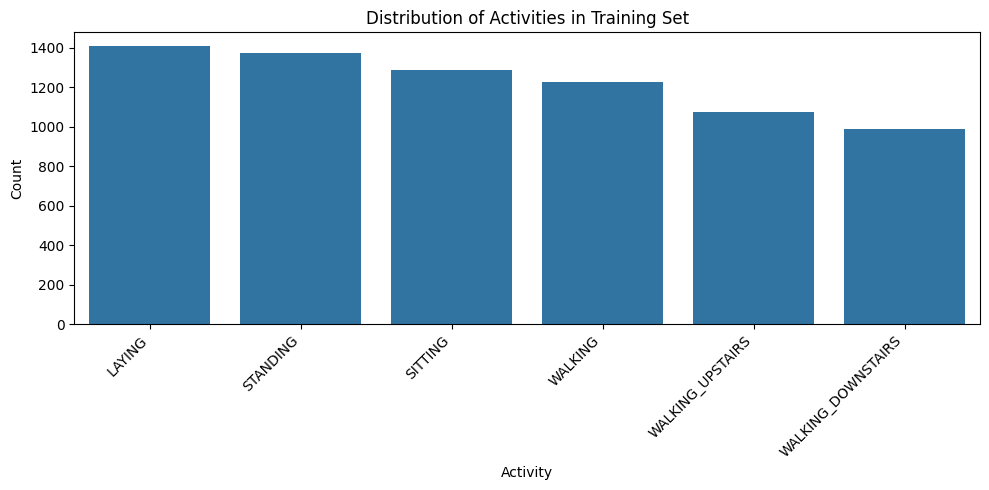


X_train_scaled head (first 5 rows, first 5 columns):
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200642          -0.063683          -0.419628         -0.868814   
1           0.055948           0.031486          -0.253908         -0.875426   
2           0.073515          -0.043416          -0.076295         -0.869039   
3           0.066696          -0.208422          -0.249712         -0.870626   
4           0.030469           0.027587          -0.109848         -0.875188   

   tBodyAcc-std()-Y  
0         -0.939441  
1         -0.923902  
2         -0.907760  
3         -0.940022  
4         -0.934878  


In [16]:
# 1. Assign Feature Names
feature_names = features[1].tolist() # features is a DataFrame with 2 columns, we want the second one
X_train.columns = feature_names
X_test.columns = feature_names

print("X_train with feature names:")
print(X_train.head())
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())




# 2. Assign Activity Names
activity_labels_dict = activity_labels.set_index(0)[1].to_dict()
y_train_labels = y_train[0].map(activity_labels_dict)
y_test_labels = y_test[0].map(activity_labels_dict)

print("\ny_train with activity names:")
print(y_train_labels.head())




# 3. Analyze Activity Distribution 
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_labels, order=y_train_labels.value_counts().index)
plt.title('Distribution of Activities in Training Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Data Scaling (Shared task)
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if you want to keep column names, optional for most models
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print("\nX_train_scaled head (first 5 rows, first 5 columns):")
print(X_train_scaled.iloc[:, :5].head())

Implementing and training basic models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# # Assuming X_train_scaled, y_train_labels, X_test_scaled, y_test_labels are ready

# # --- Logistic Regression ---
# print("--- Training Logistic Regression ---")
# log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence, liblinear is good for smaller datasets
# log_reg_model.fit(X_train_scaled, y_train_labels) # Fit on scaled training data
# y_pred_log_reg = log_reg_model.predict(X_test_scaled) # Predict on scaled test data

# print("\nLogistic Regression Performance:")
# print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_log_reg):.4f}")
# print("Classification Report:\n", classification_report(y_test_labels, y_pred_log_reg))

# # --- Support Vector Machine (SVC) ---
# print("\n--- Training Support Vector Machine (SVC) ---")
# # Using RBF kernel, which is often a good default. Can also try 'linear' or 'poly'
# svm_model = SVC(kernel='rbf', random_state=42)
# svm_model.fit(X_train_scaled, y_train_labels)
# y_pred_svm = svm_model.predict(X_test_scaled)

# print("\nSupport Vector Machine Performance:")
# print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_svm):.4f}")
# print("Classification Report:\n", classification_report(y_test_labels, y_pred_svm))

Advanced models

In [21]:
# # Install XGBoost if you haven't already: pip install xgboost
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming X_train_scaled, y_train_labels, X_test_scaled, y_test_labels are ready

# # --- Random Forest Classifier ---
# print("\n--- Training Random Forest Classifier ---")
# # n_estimators: number of trees in the forest
# # random_state: for reproducibility
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
# rf_model.fit(X_train_scaled, y_train_labels)
# y_pred_rf = rf_model.predict(X_test_scaled)

# print("\nRandom Forest Performance:")
# print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_rf):.4f}")
# print("Classification Report:\n", classification_report(y_test_labels, y_pred_rf))


# # --- XGBoost Classifier ---
# print("\n--- Training XGBoost Classifier ---")
# # XGBoost expects numerical labels starting from 0 for multi-class, so we need to encode y_labels
# # (LAYING=0, SITTING=1, STANDING=2, etc.)
# # Get unique activity labels and map them to integers
# unique_labels = y_train_labels.unique()
# label_to_int = {label: i for i, label in enumerate(unique_labels)}
# int_to_label = {i: label for label, i in label_to_int.items()}

# y_train_encoded = y_train_labels.map(label_to_int)
# y_test_encoded = y_test_labels.map(label_to_int)

# # Use 'multi:softmax' for multi-class classification, and specify num_class
# xgb_model = xgb.XGBClassifier(objective='multi:softmax', 
#                               num_class=len(unique_labels),
#                               eval_metric='mlogloss', # LogLoss for multi-class
#                               use_label_encoder=False, # Suppress warning for older versions
#                               random_state=42,
#                               n_estimators=100)
# xgb_model.fit(X_train_scaled, y_train_encoded) # Fit on encoded labels
# y_pred_xgb_encoded = xgb_model.predict(X_test_scaled)

# # Convert predictions back to original labels for classification report
# y_pred_xgb = pd.Series(y_pred_xgb_encoded).map(int_to_label)


# print("\nXGBoost Performance:")
# print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_xgb):.4f}")
# print("Classification Report:\n", classification_report(y_test_labels, y_pred_xgb))

Finding the features which contributes the most for the classification 

--- Training Random Forest for Feature Importance (to select features) ---

Top 20 Most Important Features:
                            feature  importance
0              tGravityAcc-mean()-X    0.040381
1               tGravityAcc-min()-X    0.031893
2              tGravityAcc-mean()-Y    0.028697
3              angle(X,gravityMean)    0.026618
4            tGravityAcc-energy()-X    0.024586
5              angle(Y,gravityMean)    0.023259
6               tGravityAcc-min()-Y    0.022507
7               tGravityAcc-max()-X    0.022408
8               tGravityAcc-max()-Y    0.019124
9            tGravityAcc-energy()-Y    0.016432
10             tGravityAccMag-std()    0.014095
11             angle(Z,gravityMean)    0.011405
12        tGravityAcc-arCoeff()-Z,3    0.010829
13          fBodyAccJerk-energy()-X    0.010275
14                 fBodyAcc-mad()-X    0.009739
15  fBodyAccJerk-bandsEnergy()-1,24    0.009522
16        tGravityAcc-arCoeff()-Z,2    0.009334
17             fBodyAccJerk-

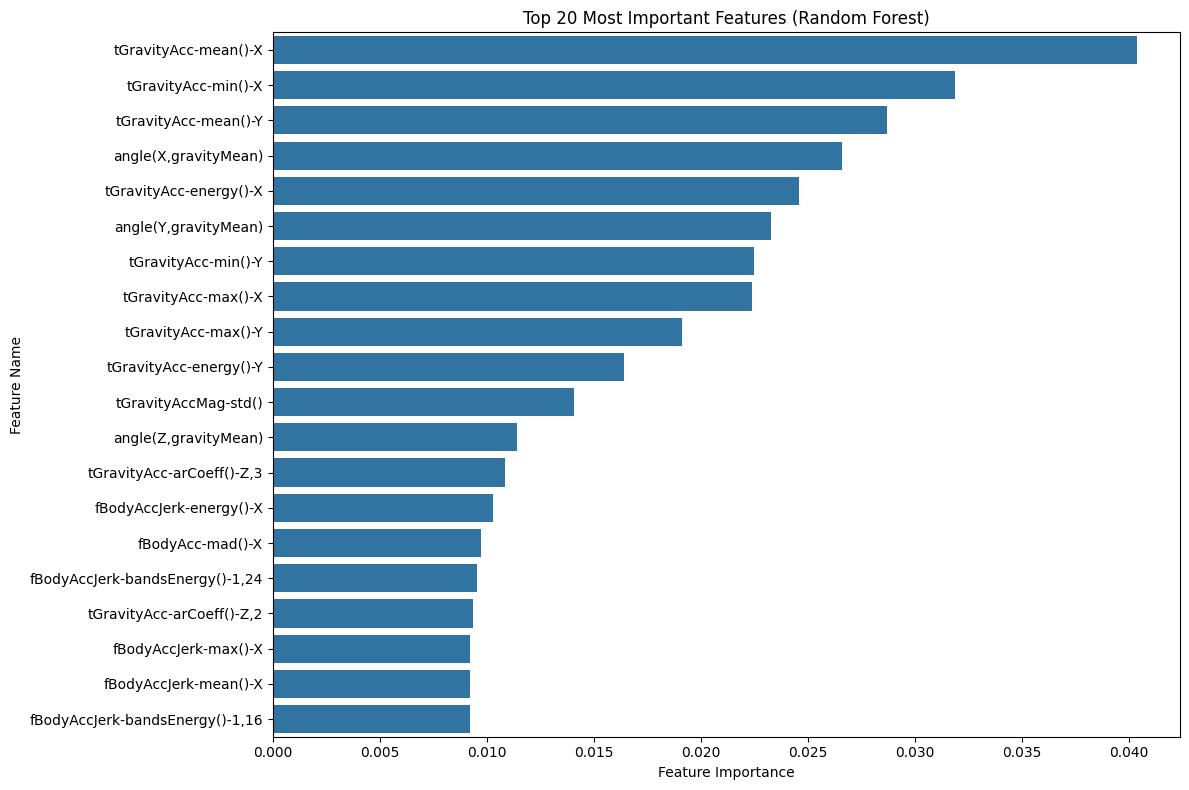


Selected 50 features based on Random Forest importance.
Example selected features: ['tGravityAcc-mean()-X', 'tGravityAcc-min()-X', 'tGravityAcc-mean()-Y', 'angle(X,gravityMean)', 'tGravityAcc-energy()-X']

Shape of X_train_selected: (7352, 58)
Shape of X_test_selected: (2947, 58)

--- Retraining Logistic Regression with Top 50 Features ---


/home/punith/Desktop/ML mini project/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



Logistic Regression Performance (with Feature Selection):
Accuracy: 0.8884
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.82      0.73      0.77       491
          STANDING       0.76      0.85      0.81       532
           WALKING       0.89      0.96      0.93       496
WALKING_DOWNSTAIRS       0.99      0.90      0.94       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.89      2947
         macro avg       0.89      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947


--- Retraining Support Vector Machine (SVC) with Top 50 Features ---

Support Vector Machine Performance (with Feature Selection):
Accuracy: 0.8887
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
   

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Ensure you have your scaled data and original feature names:
# X_train_scaled, X_test_scaled, y_train_labels, y_test_labels
# feature_names (list of 561 strings)

# --- 1. Train a RandomForest to get Feature Importances ---
# (This step is solely for determining feature importance, not for comparison as a final model)
print("--- Training Random Forest for Feature Importance (to select features) ---")
rf_for_importance = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_for_importance.fit(X_train_scaled, y_train_labels)

importances = rf_for_importance.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

print("\nTop 20 Most Important Features:")
print(feature_importance_df.head(20))

# --- 2. Visualize Top Features (Optional, but very helpful) ---
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# --- 3. Select Top K Features ---
# We'll use k=50 as a starting point. Feel free to adjust this number (e.g., 20, 100).
k = 50
selected_features = feature_importance_df['feature'].head(k).tolist()

print(f"\nSelected {k} features based on Random Forest importance.")
print("Example selected features:", selected_features[:5])

X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

print("\nShape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)


# --- 4. Retrain Logistic Regression and SVC with Selected Features ---

# --- Retrain Logistic Regression ---
print("\n--- Retraining Logistic Regression with Top", k, "Features ---")
# Increased max_iter for convergence, liblinear is good for smaller datasets
log_reg_model_fs = LogisticRegression(max_iter=1000, solver='liblinear') 
log_reg_model_fs.fit(X_train_selected, y_train_labels)
y_pred_log_reg_fs = log_reg_model_fs.predict(X_test_selected)

print("\nLogistic Regression Performance (with Feature Selection):")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_log_reg_fs):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, y_pred_log_reg_fs))


# --- Retrain Support Vector Machine (SVC) ---
print("\n--- Retraining Support Vector Machine (SVC) with Top", k, "Features ---")
# Using RBF kernel, which is often a good default.
svm_model_fs = SVC(kernel='rbf', random_state=42)
svm_model_fs.fit(X_train_selected, y_train_labels)
y_pred_svm_fs = svm_model_fs.predict(X_test_selected)

print("\nSupport Vector Machine Performance (with Feature Selection):")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_svm_fs):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, y_pred_svm_fs))

Now try with UnSupervised learning technique

--- Applying K-Means Clustering ---
Number of clusters (k) set to: 6 (based on known activities)
K-Means clustering complete.

Cross-Tabulation of True Activities vs. K-Means Clusters:
Cluster_Label         0    1    2     3    4    5
True_Activity                                    
LAYING               26    4    0  1107    0  270
SITTING             885    1    0    86    0  314
STANDING            999    0    0     0    0  375
WALKING               0  644   68     0  514    0
WALKING_DOWNSTAIRS    0  200  167     0  619    0
WALKING_UPSTAIRS      0  856    5     0  210    2


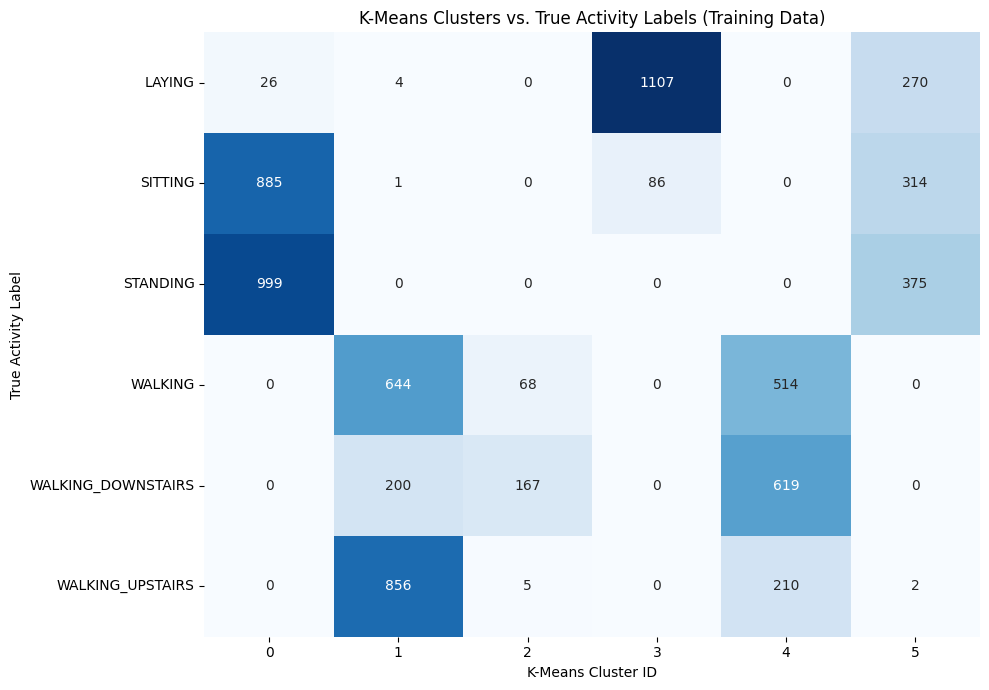


--- K-Means Clustering Evaluation Metrics ---
Homogeneity: 0.5415
Completeness: 0.5776
V-measure: 0.5589
Adjusted Rand Index: 0.4197
Adjusted Mutual Information: 0.5585


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

# Ensure you have your scaled training data (and corresponding labels) ready:
# X_train_scaled, y_train_labels

# For clustering, we'll use the full scaled training set, as we're trying to discover
# natural groupings in the entire feature space.
data_for_clustering = X_train_scaled

# --- 1. Apply K-Means Clustering ---
print("--- Applying K-Means Clustering ---")

# We know there are 6 activities, so let's try k=6
n_clusters = len(y_train_labels.unique()) # This will be 6
print(f"Number of clusters (k) set to: {n_clusters} (based on known activities)")

# Initialize KMeans. n_init='auto' is a modern default.
# random_state for reproducibility.
kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state=42)
cluster_labels = kmeans_model.fit_predict(data_for_clustering)

print("K-Means clustering complete.")

# --- 2. Evaluate Cluster Purity / Alignment with True Labels ---
# We'll create a cross-tabulation to see how many samples of each true activity
# fall into each discovered cluster.

# Create a DataFrame for easier analysis
cluster_results_df = pd.DataFrame({
    'True_Activity': y_train_labels,
    'Cluster_Label': cluster_labels
})

print("\nCross-Tabulation of True Activities vs. K-Means Clusters:")
cross_tab = pd.crosstab(cluster_results_df['True_Activity'], cluster_results_df['Cluster_Label'])
print(cross_tab)

# Visualization of the cross-tabulation
plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-Means Clusters vs. True Activity Labels (Training Data)')
plt.xlabel('K-Means Cluster ID')
plt.ylabel('True Activity Label')
plt.tight_layout()
plt.show()

# --- 3. Calculate Clustering Metrics ---
# These metrics compare the clustering result with the ground truth labels
# (Note: y_train_labels should be passed as a 1D array/series, not the raw DataFrame column)
true_labels_numeric = y_train_labels.astype('category').cat.codes # Convert string labels to numbers for metrics

print("\n--- K-Means Clustering Evaluation Metrics ---")
print(f"Homogeneity: {homogeneity_score(true_labels_numeric, cluster_labels):.4f}")
print(f"Completeness: {completeness_score(true_labels_numeric, cluster_labels):.4f}")
print(f"V-measure: {v_measure_score(true_labels_numeric, cluster_labels):.4f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels_numeric, cluster_labels):.4f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(true_labels_numeric, cluster_labels):.4f}")

--- Applying K-Means Clustering ---
Number of clusters (k) set to: 6 (based on known activities)
K-Means clustering complete.

Cross-Tabulation of True Activities vs. K-Means Clusters:
Cluster_Label         0    1    2     3    4    5
True_Activity                                    
LAYING               26    4    0  1107    0  270
SITTING             885    1    0    86    0  314
STANDING            999    0    0     0    0  375
WALKING               0  644   68     0  514    0
WALKING_DOWNSTAIRS    0  200  167     0  619    0
WALKING_UPSTAIRS      0  856    5     0  210    2


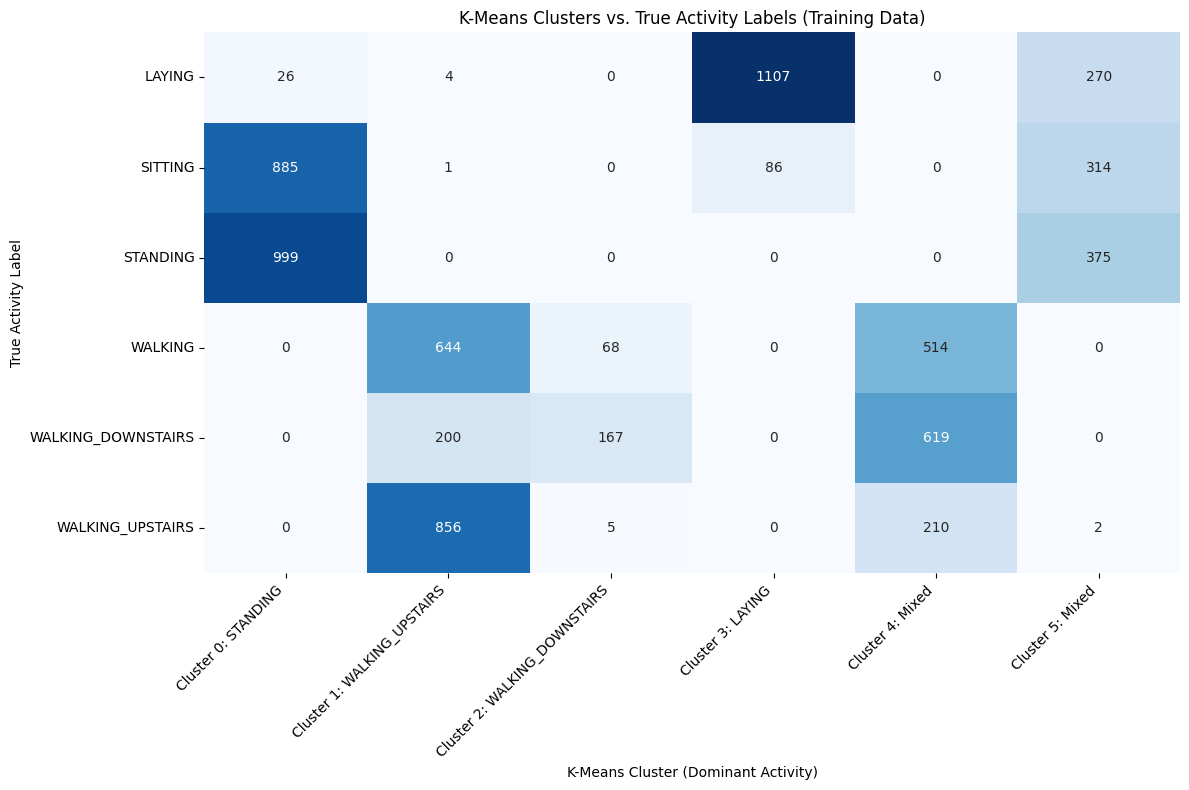


--- K-Means Clustering Evaluation Metrics ---
Homogeneity: 0.5415
Completeness: 0.5776
V-measure: 0.5589
Adjusted Rand Index: 0.4197
Adjusted Mutual Information: 0.5585


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

# Ensure you have your scaled training data (and corresponding labels) ready:
# X_train_scaled, y_train_labels

# For clustering, we'll use the full scaled training set, as we're trying to discover
# natural groupings in the entire feature space.
data_for_clustering = X_train_scaled

# --- 1. Apply K-Means Clustering (same as before) ---
print("--- Applying K-Means Clustering ---")
n_clusters = len(y_train_labels.unique())
print(f"Number of clusters (k) set to: {n_clusters} (based on known activities)")

kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state=42)
cluster_labels = kmeans_model.fit_predict(data_for_clustering)
print("K-Means clustering complete.")

# --- 2. Create Cross-Tabulation (same as before) ---
cluster_results_df = pd.DataFrame({
    'True_Activity': y_train_labels,
    'Cluster_Label': cluster_labels
})
cross_tab = pd.crosstab(cluster_results_df['True_Activity'], cluster_results_df['Cluster_Label'])
print("\nCross-Tabulation of True Activities vs. K-Means Clusters:")
print(cross_tab)


# --- 3. Determine Dominant Activity for Each Cluster ---
# This is the new part for custom X-axis labels
cluster_id_to_activity_name = {}
for cluster_id in cross_tab.columns:
    # Get the activity with the maximum count in this cluster
    dominant_activity = cross_tab[cluster_id].idxmax()
    count = cross_tab[cluster_id].max()
    
    # Check if there's a clear dominant activity or if it's very mixed
    total_in_cluster = cross_tab[cluster_id].sum()
    if total_in_cluster > 0 and count / total_in_cluster > 0.5: # If dominant activity is >50% of the cluster
        cluster_id_to_activity_name[cluster_id] = f'Cluster {cluster_id}: {dominant_activity}'
    else:
        # If no clear majority, label it as "Mixed" or just keep the ID
        cluster_id_to_activity_name[cluster_id] = f'Cluster {cluster_id}: Mixed'

# Optional: Refine labels for clarity, especially if clusters are very mixed but have strong components
# Example refinement based on previous analysis:
# Cluster 0: mainly SITTING/STANDING -> 'Static (Sitting/Standing)'
# Cluster 1: mainly WALKING/WALKING_UPSTAIRS -> 'Dynamic (Walking)'
# Cluster 3: mainly LAYING -> 'Laying'
# Cluster 4: mainly WALKING/WALKING_DOWNSTAIRS -> 'Dynamic (Walking)'
# For simplicity, let's stick to the dominant activity name first.

# You can manually adjust `cluster_id_to_activity_name` if you want more specific composite labels
# For example, from your previous output:
# cluster_id_to_activity_name[0] = 'Cluster 0: Sitting/Standing'
# cluster_id_to_activity_name[1] = 'Cluster 1: Walking/Upstairs'
# cluster_id_to_activity_name[3] = 'Cluster 3: Laying'
# cluster_id_to_activity_name[4] = 'Cluster 4: Walking/Downstairs'
# For the plot, let's use the one generated by `idxmax` as the base.

# --- 4. Visualization of the cross-tabulation with custom x-axis labels ---
plt.figure(figsize=(12, 8)) # Increased figure size for better label visibility
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-Means Clusters vs. True Activity Labels (Training Data)')
plt.xlabel('K-Means Cluster (Dominant Activity)')
plt.ylabel('True Activity Label')

# Set custom x-axis tick labels
# Ensure the order matches the columns of the cross_tab DataFrame
x_tick_labels = [cluster_id_to_activity_name.get(col_id, f'Cluster {col_id}') for col_id in cross_tab.columns]
plt.xticks(ticks=np.arange(len(x_tick_labels)) + 0.5, labels=x_tick_labels, rotation=45, ha='right') # Rotate for readability

plt.tight_layout()
plt.show()

# --- 5. Calculate Clustering Metrics (same as before) ---
true_labels_numeric = y_train_labels.astype('category').cat.codes
print("\n--- K-Means Clustering Evaluation Metrics ---")
print(f"Homogeneity: {homogeneity_score(true_labels_numeric, cluster_labels):.4f}")
print(f"Completeness: {completeness_score(true_labels_numeric, cluster_labels):.4f}")
print(f"V-measure: {v_measure_score(true_labels_numeric, cluster_labels):.4f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels_numeric, cluster_labels):.4f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(true_labels_numeric, cluster_labels):.4f}")

Hyperparameter Tuning for the same Supervised learning models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Ensure you have your SELECTED scaled data ready:
# X_train_selected, X_test_selected, y_train_labels, y_test_labels
# (These should be outputs from your previous "Retrain Models with Selected Features" step)


# --- Hyperparameter Tuning for Logistic Regression (using Top 50 Features) ---
print("--- Hyperparameter Tuning for Logistic Regression (Top 50 Features) ---")

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],    # liblinear is good for smaller datasets and L1 penalty
    'max_iter': [1000]                   # Ensure convergence
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, 
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on the selected training features
grid_search_lr.fit(X_train_selected, y_train_labels) 

print("\nBest parameters for Logistic Regression (Top 50 Features):", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression (Top 50 Features):", f"{grid_search_lr.best_score_:.4f}")
best_lr_model = grid_search_lr.best_estimator_
# Predict on the selected test features
y_pred_best_lr = best_lr_model.predict(X_test_selected) 

print("\nLogistic Regression Performance (Tuned, Top 50 Features):")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_best_lr):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, y_pred_best_lr))


# --- Hyperparameter Tuning for Support Vector Machine (SVC) (using Top 50 Features) ---
print("\n--- Hyperparameter Tuning for Support Vector Machine (SVC) (Top 50 Features) ---")

param_grid_svc = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. 'scale' is default.
    'kernel': ['rbf'] # Focusing on RBF kernel
}

grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on the selected training features
grid_search_svc.fit(X_train_selected, y_train_labels)

print("\nBest parameters for SVC (Top 50 Features):", grid_search_svc.best_params_)
print("Best cross-validation accuracy for SVC (Top 50 Features):", f"{grid_search_svc.best_score_:.4f}")

best_svc_model = grid_search_svc.best_estimator_ 
# Predict on the selected test features
y_pred_best_svc = best_svc_model.predict(X_test_selected)

print("\nSupport Vector Machine Performance (Tuned, Top 50 Features):")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_best_svc):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, y_pred_best_svc))

--- Hyperparameter Tuning for Logistic Regression (Top 50 Features) ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/punith/Desktop/ML mini project/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/punith/Desktop/ML mini project/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/punith/Desktop/ML mini project/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An e


Best parameters for Logistic Regression (Top 50 Features): {'C': 1, 'max_iter': 1000, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression (Top 50 Features): 0.8954

Logistic Regression Performance (Tuned, Top 50 Features):
Accuracy: 0.8884
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.82      0.73      0.77       491
          STANDING       0.76      0.85      0.81       532
           WALKING       0.89      0.96      0.93       496
WALKING_DOWNSTAIRS       0.99      0.90      0.94       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.89      2947
         macro avg       0.89      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947


--- Hyperparameter Tuning for Support Vector Machine (SVC) (Top 50 Features) ---
Fitting 5 folds for each

<h2 style="color: red;">Even after the hyper parameter tuning there's no imporvement in the accuracy<h2>